# Pokemon Analysis Project

Like a large number of early to mid-30-year-olds I spent a significant portion of my gradeschool years collecting and playing the Pokemon card game. Okay, really all I did was collect the cards because they looked cool, but who *really* played the game?

Anyways, I came across this data set on Kaggle.com from user Alberto Barradas and thought it'd be fun to look through

In [21]:
# Load some sweet libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a pandas DataFrame
df = pd.read_csv('Pokemon.csv')

## Exploratory Data Analysis (EDA)

So when I was last invested in collecting Pokemon cards I remember there being 151 Pokemon only after the much-anticipated debut of Mew, the precursor to Mewtwo. Let's see how many Pokemon there are at the time this data was collected

In [22]:
# Assuming the length of the data represents the number of Pokemon
print(len(df))

#

800


Damn ... they've added quite a few since I was last involved. Okay cool. So let's dive in a little bit more. 

Let's see what the columns and the shape of the data look like.

In [23]:
# Print a table with descriptive statistics for each column and overall data
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [24]:
# Print the name of all the columns 
print(df.columns)

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


In [25]:
# Print the first 5 rows of data
print(df.head())

   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  


In [26]:
print(df['Type 1'].unique())

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


So we've got kind of an idea of what the overall look of the data is. Let's start digging deeper.

I remember everyone's favorite card to try and collect and maybe the most powerful was Charizard.

In [27]:
# Print the stats for Charizard
print(df[df['Name'] == 'Charizard'])

   #       Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
6  6  Charizard   Fire  Flying    534  78      84       78      109       85   

   Speed  Generation  Legendary  
6    100           1      False  


Well things seem to have changed. Charizar appears to be far from the most powerful Pokemon. So who is the most power Pokemon?

In [28]:
# Print the information for the most powerful Pokemon
print(df[df['Total'] == 780])

       #                   Name   Type 1    Type 2  Total   HP  Attack  \
163  150    MewtwoMega Mewtwo X  Psychic  Fighting    780  106     190   
164  150    MewtwoMega Mewtwo Y  Psychic       NaN    780  106     150   
426  384  RayquazaMega Rayquaza   Dragon    Flying    780  105     180   

     Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  
163      100      154      100    130           1       True  
164       70      194      120    140           1       True  
426      100      180      100    115           3       True  


Interesting . . . Let's take a look at the spread of all the individual stats 

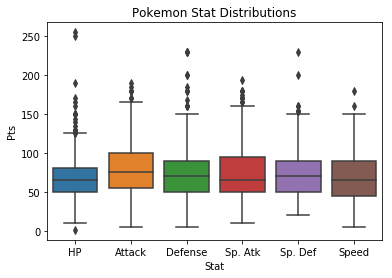

In [32]:
# Let's drop the name, number, generation, and legendary columns
df_drop = df.drop(['#','Name', 'Type 1', 'Type 2', 'Total', 'Generation', 'Legendary'],1)

sns.boxplot(data=df_drop)
plt.title("Pokemon Stat Distributions")
plt.ylabel('Pts')
plt.xlabel('Stat')
plt.show()

ValueError: could not convert string to float: 'Bulbasaur'